In [30]:
#Leitura e limpeza de dados

import pandas as pd
import matplotlib.pyplot as plt


# Lê o arquivo CSV
tabela = pd.read_csv("Ecommerce_DBS.csv")

# Elimina valores faltantes
tabela.dropna(inplace=True)

# Lista de colunas a serem ignoradas (removidas)
ignore = ['Customer ID', 'Total Purchase Amount', 'Latitude', 'Longituide', 'Country', 'State']

# Remove as colunas especificadas
tabela.drop(columns=ignore, inplace=True)

# Havia um pequeno espaço no nome da coluna de idade, alterei para que não atrapalhe as análises
tabela.rename(columns={'Customer Age ': 'Customer Age'}, inplace=True)

tabela


,Purchase Date,Product Category,Product Price,Quantity,NPS,Customer Age,Gender,Source
0,08/09/2020,Electronics,12,3,7,20,Male,Instagram Campign
1,05/03/2022,Home,468,4,8,20,Male,Instagram Campign
2,23/05/2022,Home,288,2,10,20,Male,SEM
3,12/11/2020,Clothing,196,1,3,20,Male,Instagram Campign
4,27/11/2020,Home,449,1,3,20,Female,Instagram Campign
...,...,...,...,...,...,...,...,...
249995,10/08/2023,Clothing,279,2,1,55,Male,SEM
249996,23/11/2021,Home,27,1,1,42,Female,Instagram Campign
249997,02/07/2020,Home,17,5,0,41,Male,Instagram Campign
249998,30/12/2020,Books,398,2,8,34,Female,Instagram Campign


In [31]:
#Conta a quantidade de vendas por canal

qtnd_sales_by_source = tabela['Source'].value_counts().reset_index()

qtnd_sales_by_source.columns = ['Source', 'Number of Sales']

qtnd_sales_by_source

,Source,Number of Sales
0,Instagram Campign,70170
1,FaceBook campaign,66773
2,SEM,66743
3,Organic Search,46314


,Purchase Date,Product Category,Product Price,Quantity,NPS,Customer Age,Gender,Source
0,08/09/2020,Electronics,12,3,7,20,Male,Instagram Campign
1,05/03/2022,Home,468,4,8,20,Male,Instagram Campign
2,23/05/2022,Home,288,2,10,20,Male,SEM
3,12/11/2020,Clothing,196,1,3,20,Male,Instagram Campign
4,27/11/2020,Home,449,1,3,20,Female,Instagram Campign
...,...,...,...,...,...,...,...,...
249995,10/08/2023,Clothing,279,2,1,55,Male,SEM
249996,23/11/2021,Home,27,1,1,42,Female,Instagram Campign
249997,02/07/2020,Home,17,5,0,41,Male,Instagram Campign
249998,30/12/2020,Books,398,2,8,34,Female,Instagram Campign


C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\1180935870.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ss[i], f"{ss[i]} ({percentage_sales[i]:.2f}%)", ha='center', va='bottom')


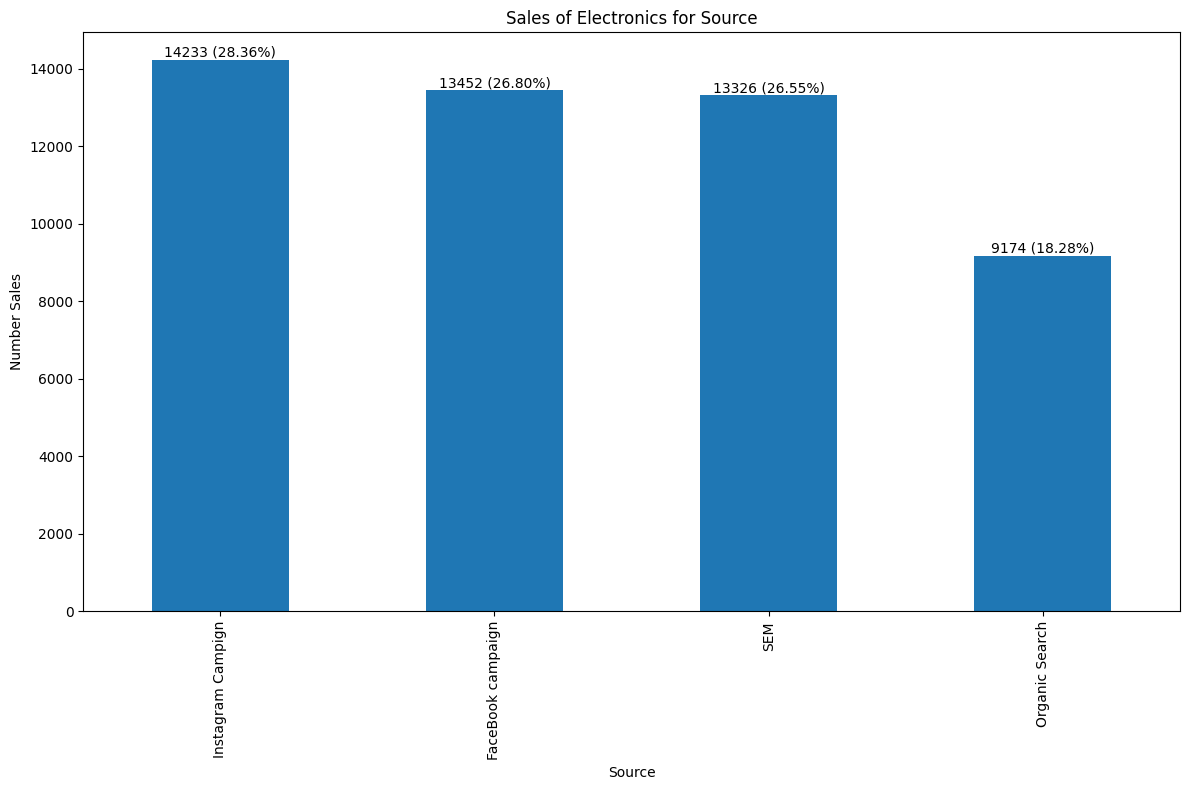

In [32]:
# Filtra os dados por categoria eletronicos
category = 'Electronics'
df_ctg = tabela[tabela['Product Category'] == category]

# Conta a quantidade de vendas por canal
ss = df_ctg['Source'].value_counts()

# Calcula a porcentagem de vendas por canal
percentage_sales = (ss / ss.sum()) * 100

# Constrói um gráfico da quantidade de vendas por canal com a porcentagem
plt.figure(figsize=(12, 8))
ax = ss.plot(kind='bar')
plt.title(f'Sales of {category} for Source')
plt.xlabel('Source')
plt.ylabel('Number Sales')

# Adiciona anotações no gráfico com a porcentagem
for i in range(len(ss)):
    plt.text(i, ss[i], f"{ss[i]} ({percentage_sales[i]:.2f}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()


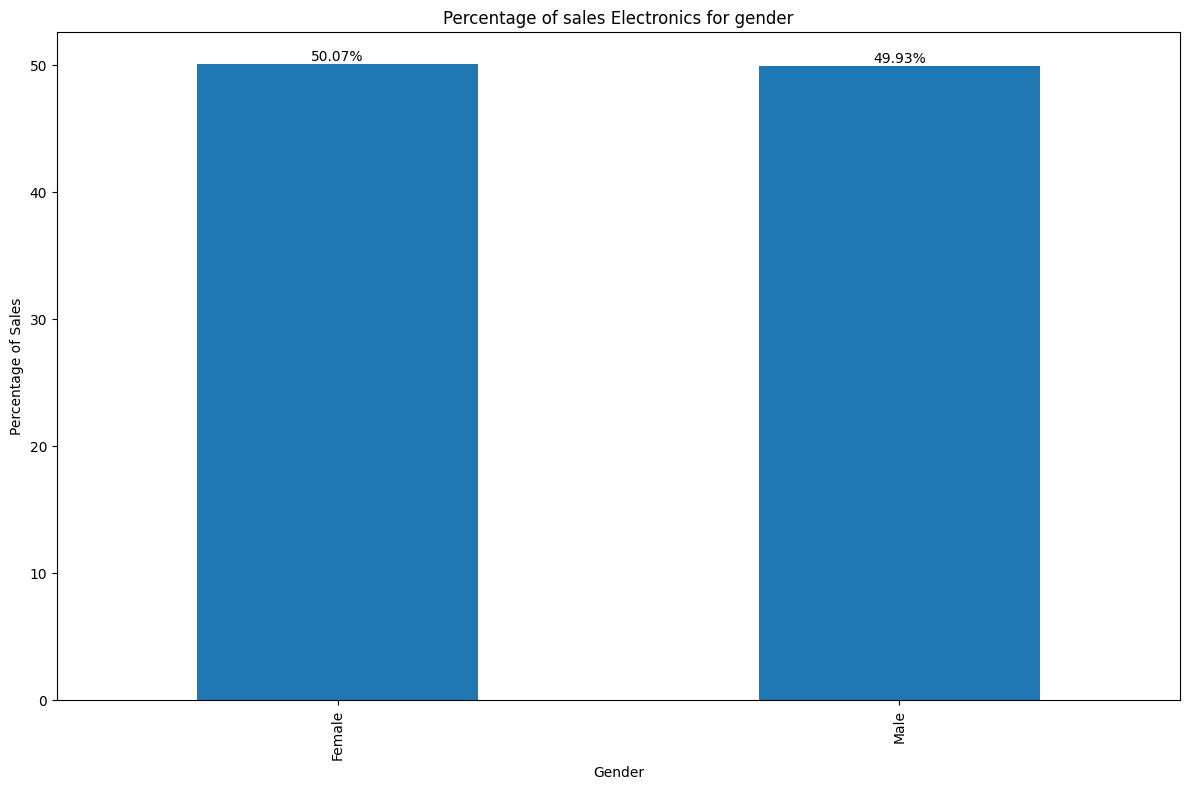

In [33]:
# Filtra os dados por categoria
category = 'Electronics'
df_gen = tabela[tabela['Product Category'] == category]

# Conta a quantidade de vendas por gênero
cg = df_gen['Gender'].value_counts()

# Calcula a porcentagem de vendas por gênero
pctg = cg / cg.sum() * 100

# Constrói um gráfico da porcentagem de vendas por gênero
plt.figure(figsize=(12, 8))
px = pctg.plot(kind='bar')
plt.title(f'Percentage of sales {category} for gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Sales')

# Adiciona anotações no gráfico
for i in px.patches:
    px.annotate(f'{i.get_height():.2f}%', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\3935044039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics_data['Age Group'] = pd.cut(electronics_data['Customer Age'], bins=bins, labels=labels, right=False)
C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\3935044039.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentage_sales[i]


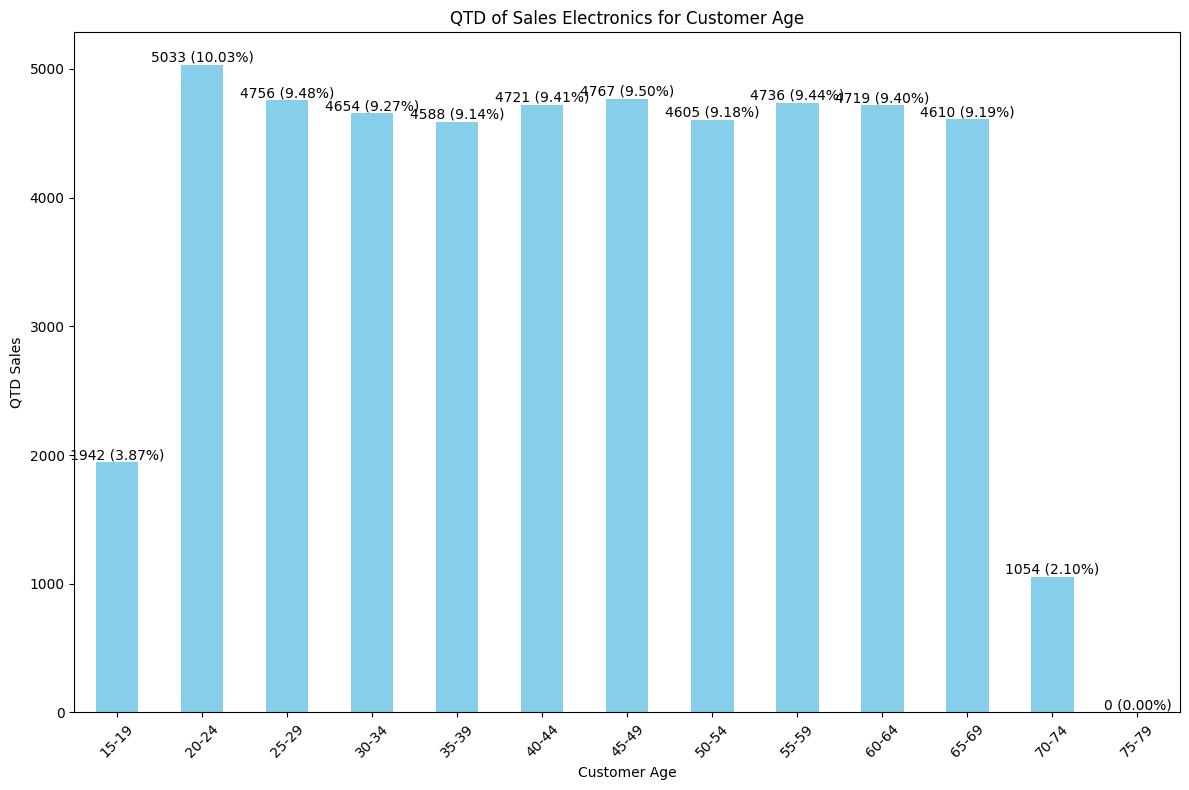

In [34]:
# Filtra os dados por categoria 'Electronics' e remove os valores nulos de idade
electronics_data = tabela[(tabela['Product Category'] == 'Electronics') & (tabela['Customer Age'].notnull())]

# Define as faixas etárias de 5 em 5 anos, começando a partir de 15 até 80 anos
bins = list(range(15, 81, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Criando uma nova coluna 'Age Group' com as faixas etárias
electronics_data['Age Group'] = pd.cut(electronics_data['Customer Age'], bins=bins, labels=labels, right=False)

# Conta a quantidade de vendas por faixa etária
sales_by_age_group = electronics_data['Age Group'].value_counts().sort_index()

# Calcula a porcentagem representativa dos dados
percentage_sales = (sales_by_age_group / sales_by_age_group.sum()) * 100

# Constrói um gráfico de barras para a quantidade de vendas por faixa etária com a porcentagem
plt.figure(figsize=(12, 8))
ax = sales_by_age_group.plot(kind='bar', color='skyblue')
plt.title('QTD of Sales Electronics for Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('QTD Sales')
plt.xticks(rotation=45)

# Adiciona anotações no gráfico com a quantidade e porcentagem
for i, p in enumerate(ax.patches):
    percentage = percentage_sales[i]
    ax.annotate(f'{p.get_height()} ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

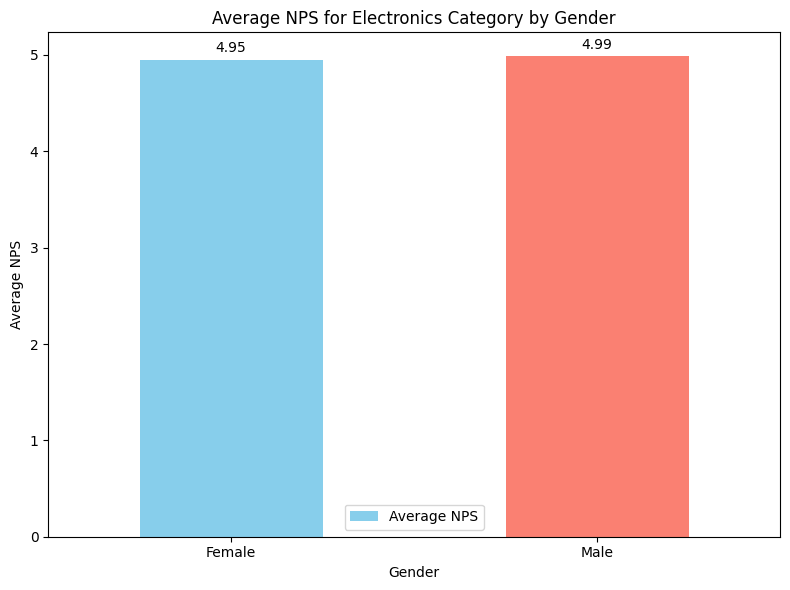

In [35]:
# Filtrar os dados apenas para a categoria "Eletrônicos"
electronics_data = tabela[tabela['Product Category'] == 'Electronics']

# Calcular o NPS médio por gênero
average_nps_by_gender = electronics_data.groupby('Gender')['NPS'].mean()

# Contar o total de vendas por gênero
count_by_gender = electronics_data['Gender'].value_counts()

# Plotar o gráfico
plt.figure(figsize=(8, 6))
average_nps_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], label='Average NPS')

# Adicionar a média de NPS acima das barras
for i, nps in enumerate(average_nps_by_gender):
    plt.text(i, nps + 0.05, f'{nps:.2f}', ha='center', va='bottom')

plt.title('Average NPS for Electronics Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Average NPS')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()


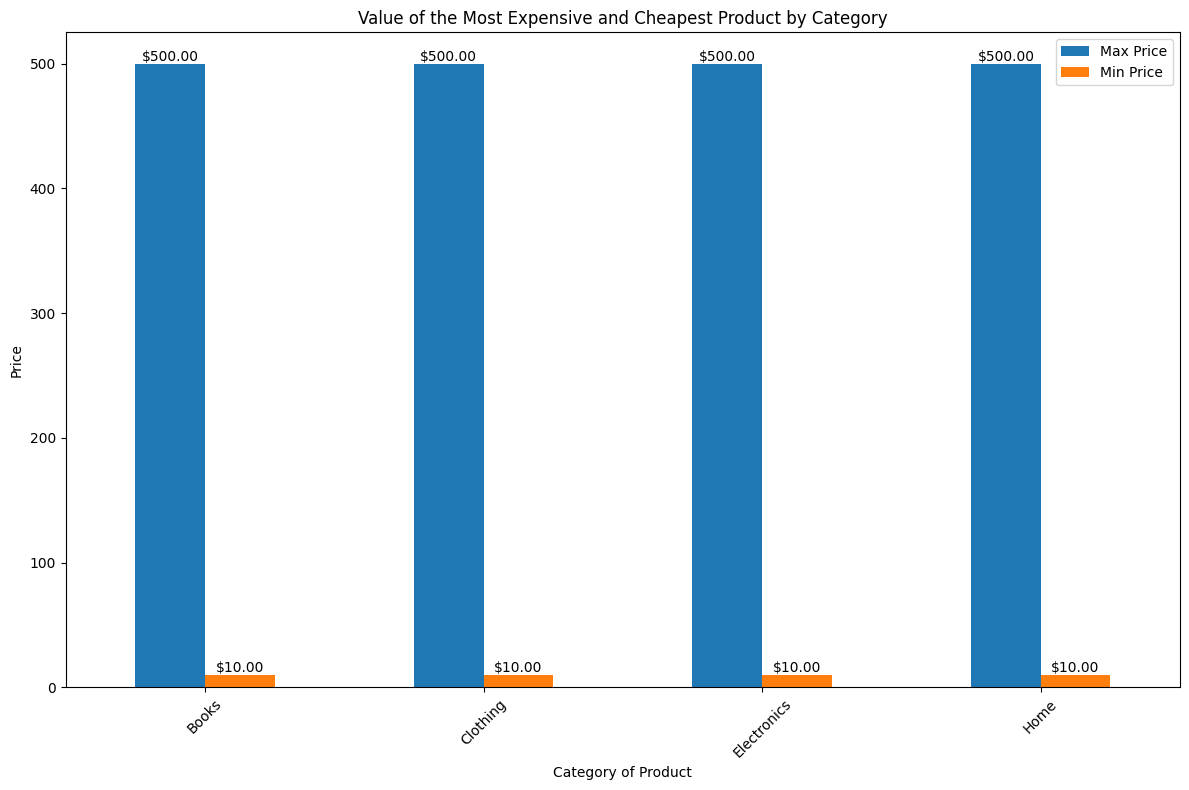

In [36]:
# Calcula o valor do produto mais caro e mais barato por categoria
max_price_by_category = tabela.groupby('Product Category')['Product Price'].max()
min_price_by_category = tabela.groupby('Product Category')['Product Price'].min()

# Constrói um Df com os valores mais caros e mais baratos
price_comparison = pd.DataFrame({
    'Max Price': max_price_by_category,
    'Min Price': min_price_by_category
}).reset_index()

# Constrói um gráfico de barras para os valores mais caros e mais baratos por categoria
plt.figure(figsize=(12, 8))
px = price_comparison.plot(kind='bar', x='Product Category', y=['Max Price', 'Min Price'], ax=plt.gca())
plt.title('Value of the Most Expensive and Cheapest Product by Category')
plt.xlabel('Category of Product')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Adiciona anotações no gráfico
for p in px.patches:
    px.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

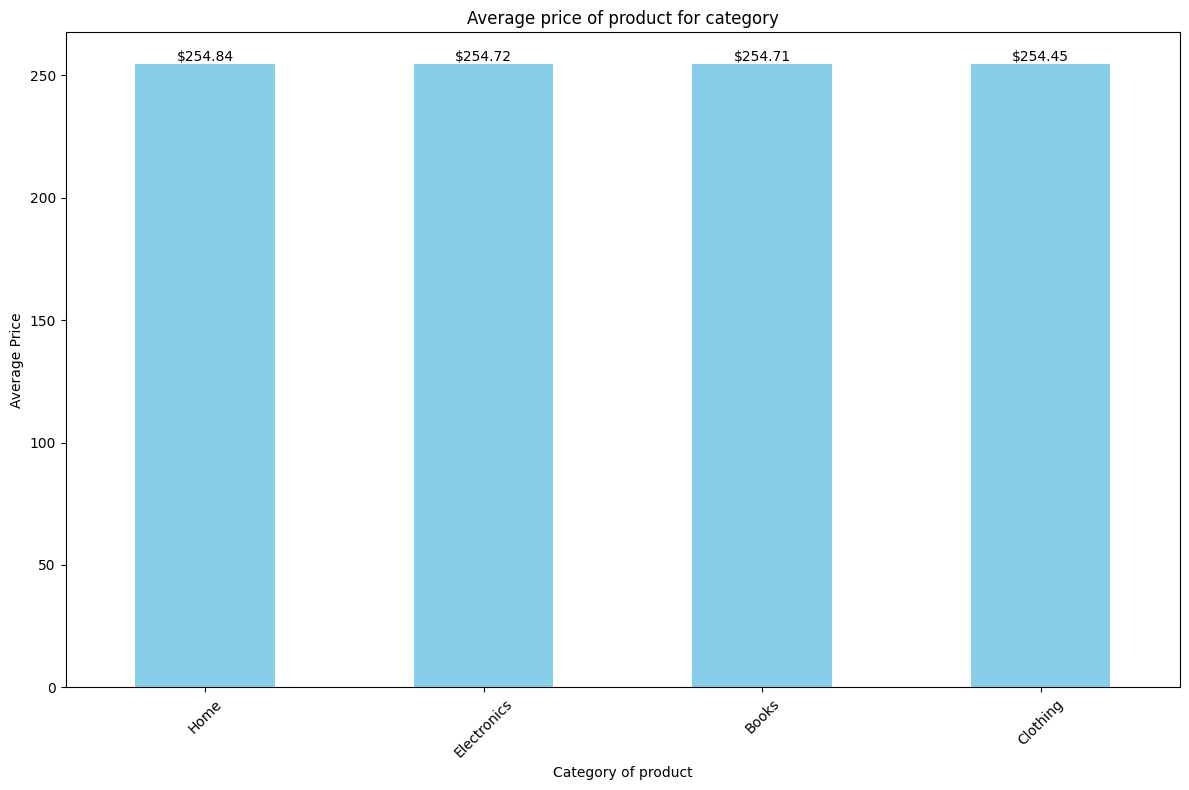

In [37]:
# Calcula o preço médio por categoria
average_price_by_category = tabela.groupby('Product Category')['Product Price'].mean()

# Ordena os valores de preço médio por categoria em ordem decrescente
average_price_by_category = average_price_by_category.sort_values(ascending=False)

# Gráfico de barras para o preço médio por categoria
plt.figure(figsize=(12, 8))
px = average_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average price of product for category')
plt.xlabel('Category of product')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Adiciona anotações no gráfico
for p in px.patches:
    px.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


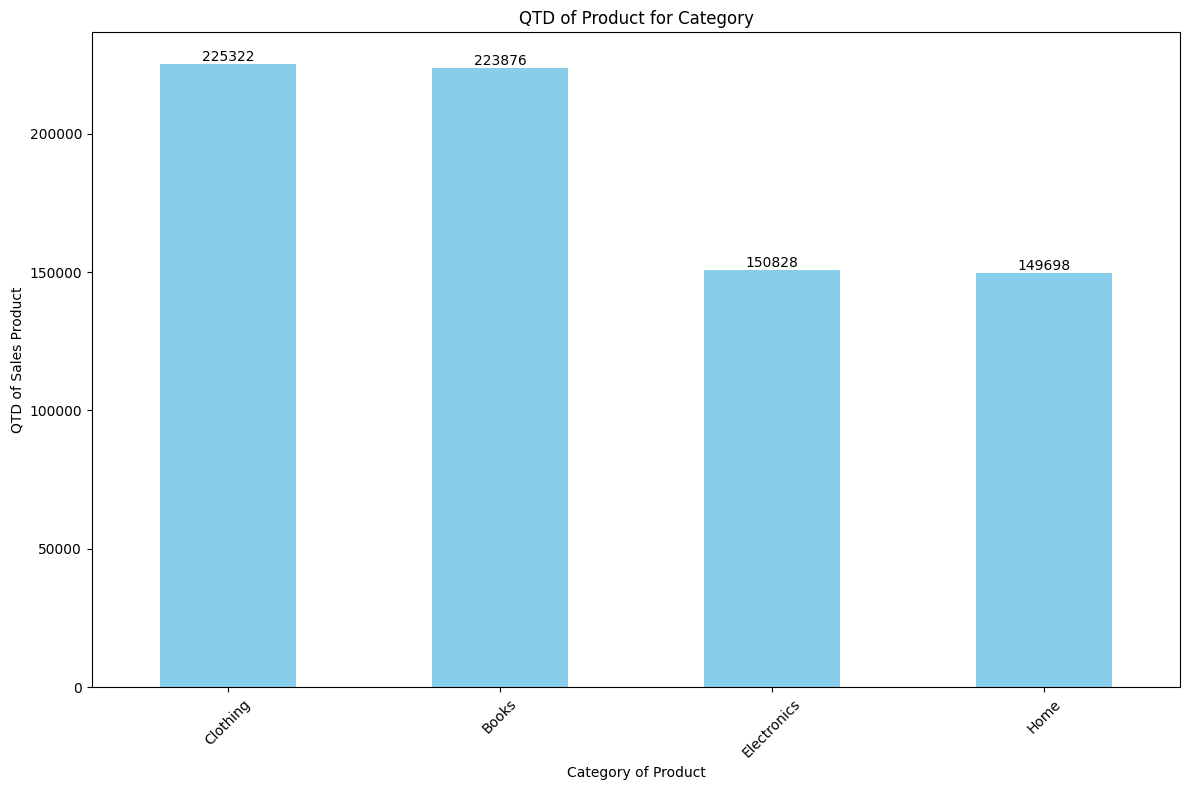

In [38]:
#Produto por categoria

# Multiplica a quantidade de produtos vendidos pelo número na coluna 'Quantity'
sales_by_category = tabela.groupby('Product Category')['Quantity'].sum()

# Ordena os valores de venda por categoria em ordem decrescente
sales_by_category = sales_by_category.sort_values(ascending=False)

# Constrói um gráfico de barras para a quantidade de produtos vendidos por categoria
plt.figure(figsize=(12, 8))
ax = sales_by_category.plot(kind='bar', color='skyblue')
plt.title('QTD of Product for Category')
plt.xlabel('Category of Product')
plt.ylabel('QTD of Sales Product')
plt.xticks(rotation=45)

# Adiciona anotações no gráfico
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


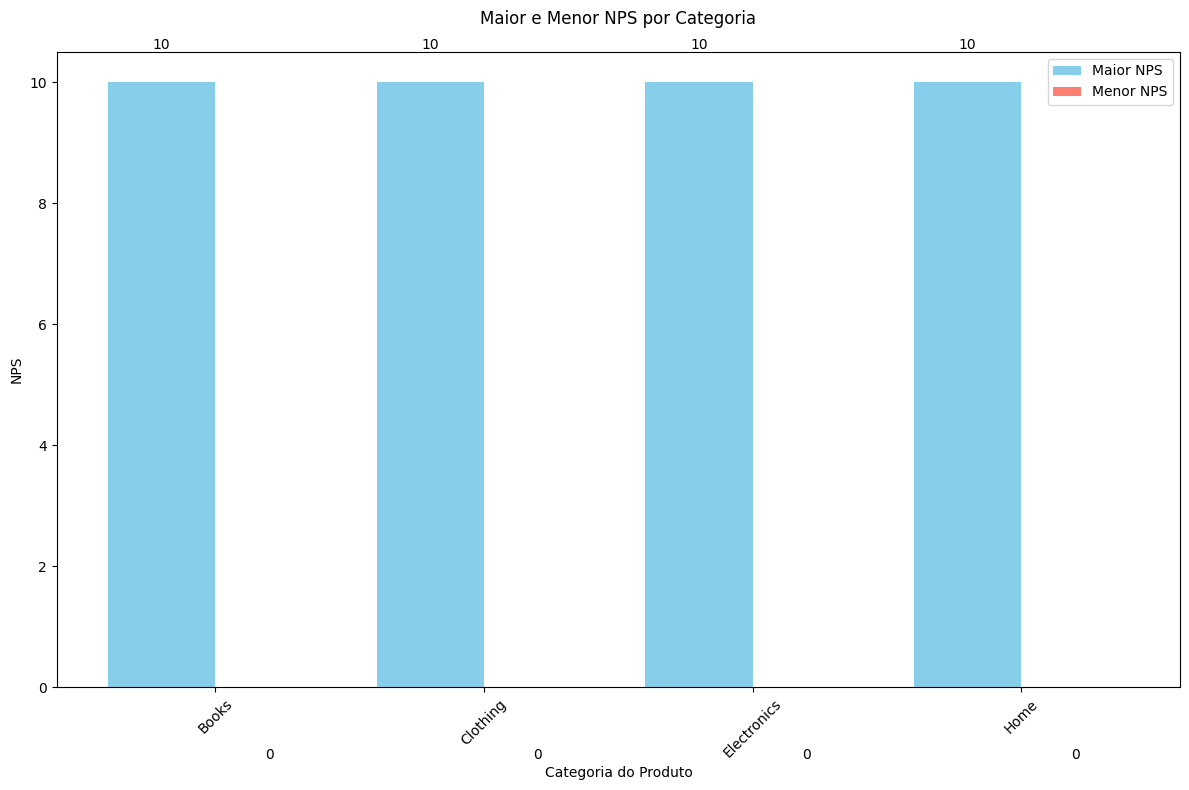

In [39]:
# Encontrar o maior e o menor NPS por categoria
max_nps_by_category = tabela.groupby('Product Category')['NPS'].max()
min_nps_by_category = tabela.groupby('Product Category')['NPS'].min()

# Cria um DataFrame para armazenar os dados
nps_data = pd.DataFrame({'Maior NPS': max_nps_by_category, 'Menor NPS': min_nps_by_category})

# Obtém os valores do maior e menor NPS
max_nps_values = nps_data['Maior NPS'].values
min_nps_values = nps_data['Menor NPS'].values

# Obtém os rótulos das categorias
categories = nps_data.index

# Construir o gráfico
plt.figure(figsize=(12, 8))

# Gráfico de barras para o maior e menor NPS
bar_width = 0.4  # Largura das barras
plt.bar(categories, max_nps_values, color='skyblue', width=bar_width, label='Maior NPS')
plt.bar([x + bar_width for x in range(len(categories))], min_nps_values, color='salmon', width=bar_width, label='Menor NPS')

# Adiciona os valores do NPS acima das barras
for i in range(len(categories)):
    plt.text(i, max_nps_values[i] + 0.5, str(max_nps_values[i]), ha='center', va='bottom')
    plt.text(i + bar_width, min_nps_values[i] - 1, str(min_nps_values[i]), ha='center', va='top')

plt.title('Maior e Menor NPS por Categoria', pad=20)  # Espaçamento ajustado
plt.xlabel('Categoria do Produto')
plt.ylabel('NPS')
plt.xticks([r + bar_width / 2 for r in range(len(categories))], categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

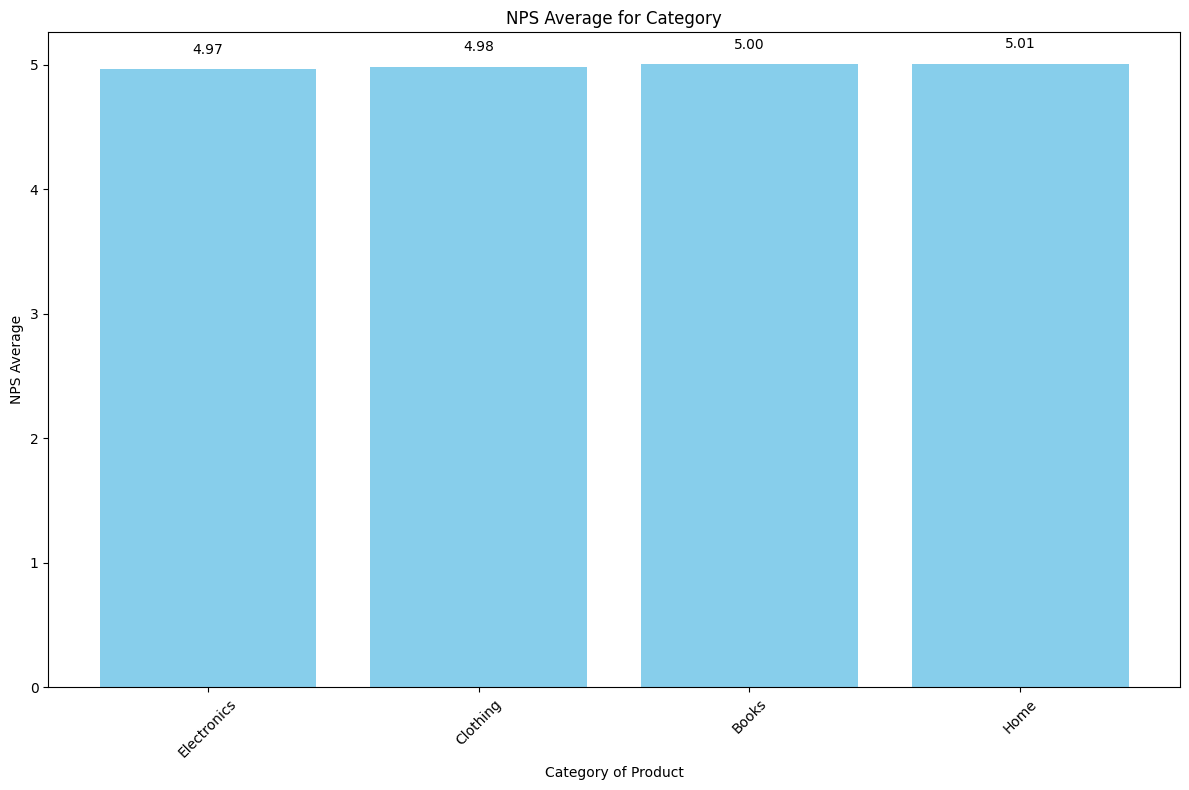

In [40]:
# Calcular o NPS médio por categoria
nps_mean_by_category = tabela.groupby('Product Category')['NPS'].mean()

# Ordenar os valores de NPS médio por categoria em ordem crescente
nps_mean_by_category = nps_mean_by_category.sort_values(ascending=True)

# Obtém os rótulos das categorias
categories = nps_mean_by_category.index

# Obtém os valores do NPS médio
nps_mean_values = nps_mean_by_category.values

# Construir o gráfico
plt.figure(figsize=(12, 8))
plt.bar(categories, nps_mean_values, color='skyblue')

# Adicionar os valores do NPS médio acima das barras
for i in range(len(categories)):
    plt.text(i, nps_mean_values[i] + 0.1, f'{nps_mean_values[i]:.2f}', ha='center', va='bottom')

plt.title('NPS Average for Category')
plt.xlabel('Category of Product')
plt.ylabel('NPS Average')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


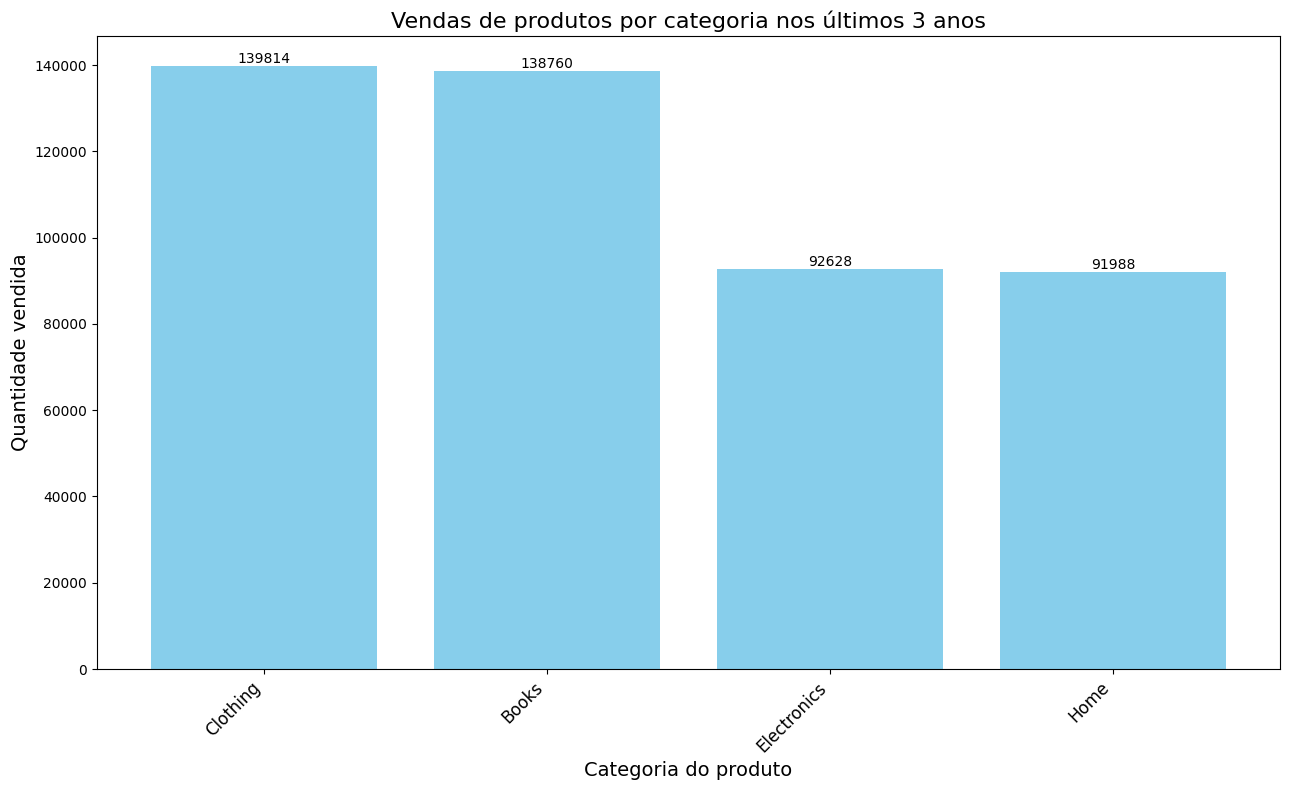

In [41]:
# Converter a coluna de datas para o tipo datetime, especificando o formato pois no arquivo csv a data estava em outro formato
tabela['Purchase Date'] = pd.to_datetime(tabela['Purchase Date'], format='%d/%m/%Y')

# Filtrar os dados para incluir apenas os registros dos últimos 3 anos
data_atual = pd.to_datetime('now')
data_limite = data_atual - pd.DateOffset(years=3)
tabela_ultimos_3_anos = tabela[tabela['Purchase Date'] >= data_limite]

# Calcular o total de vendas por categoria nos últimos 3 anos e ordenar do maior para o menor
total_vendas_ultimos_3_anos = tabela_ultimos_3_anos.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Obtém os rótulos das categorias
categories = total_vendas_ultimos_3_anos.index

# Obtém os valores do total de vendas
total_sales_values = total_vendas_ultimos_3_anos.values

# Construir o gráfico
plt.figure(figsize=(13, 8))
bars = plt.bar(categories, total_sales_values, color='skyblue')

# Adiciona os valores do total de vendas acima das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Vendas de produtos por categoria nos últimos 3 anos', fontsize=16)
plt.xlabel('Categoria do produto', fontsize=14)
plt.ylabel('Quantidade vendida', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


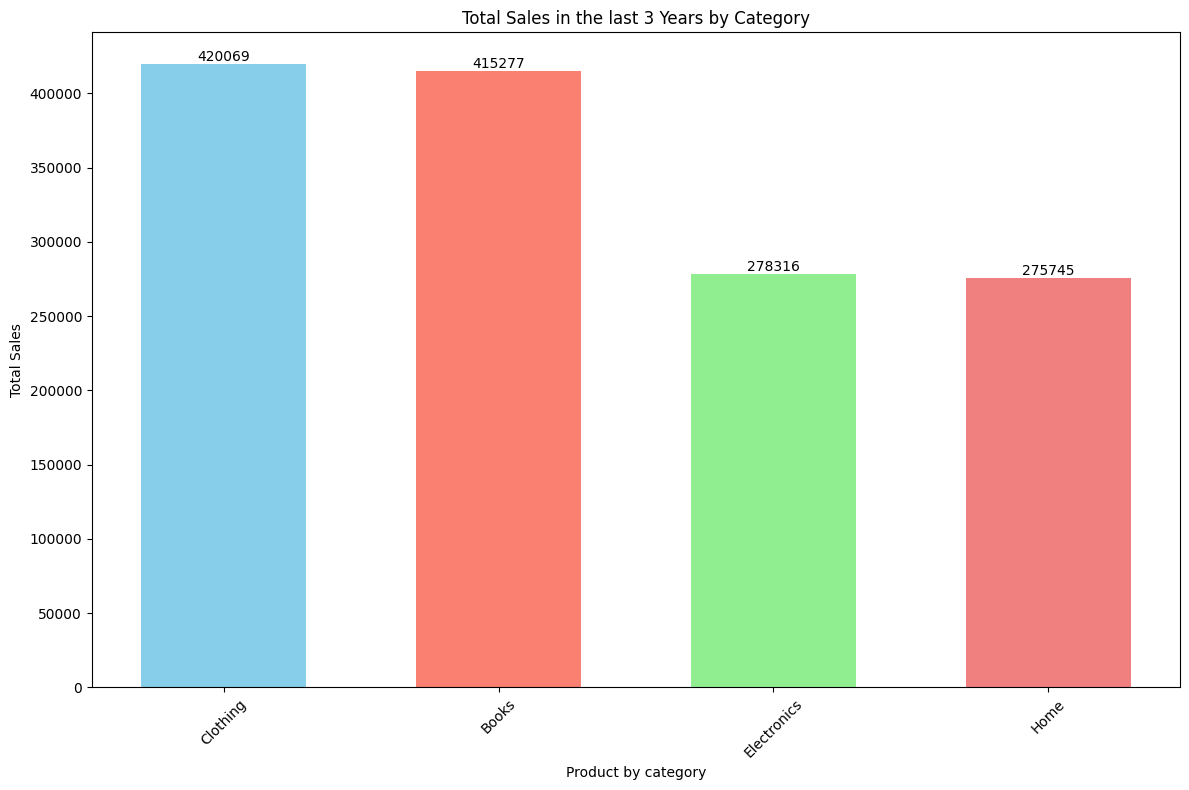

In [42]:
#Analise 3 anos por qtd

# Converter a coluna 'Purchase Date' para o tipo datetime
tabela['Purchase Date'] = pd.to_datetime(tabela['Purchase Date'], format='%d/%m/%Y')

# Converter a coluna de datas para o tipo datetime, especificando o formato pois no arquivo csv a data estava em outro formato
data_atual = pd.to_datetime('now')
data_limite = data_atual - pd.DateOffset(years=3)
tabela_ultimos_3_anos = tabela[tabela['Purchase Date'] >= data_limite]

# Calcular o total de vendas por categoria nos últimos 3 anos multiplicado pela coluna 'Quantity'
total_vendas_ultimos_3_anos = (tabela_ultimos_3_anos.groupby('Product Category')['Quantity'].sum() * 
                               tabela_ultimos_3_anos.groupby('Product Category')['Quantity'].mean())

# Ordenar os valores de vendas totais por categoria em ordem decrescente
total_vendas_ultimos_3_anos = total_vendas_ultimos_3_anos.sort_values(ascending=False)

# Obter os rótulos das categorias ordenadas
categories = total_vendas_ultimos_3_anos.index

# Obter os valores ordenados do total de vendas
total_sales_values = total_vendas_ultimos_3_anos.values

# Cores para cada categoria
cores = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']

# Construir o gráfico
plt.figure(figsize=(12, 8))
bars = plt.bar(categories, total_sales_values, color=cores, width=0.6)  # Definindo a largura das barras

# Adicionar os valores do total de vendas acima das barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             ha='center', va='bottom')

plt.title('Total Sales in the last 3 Years by Category')
plt.xlabel('Product by category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\322812570.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ss[i], f"{ss[i]} ({percentage_sales[i]:.2f}%)", ha='center', va='bottom')


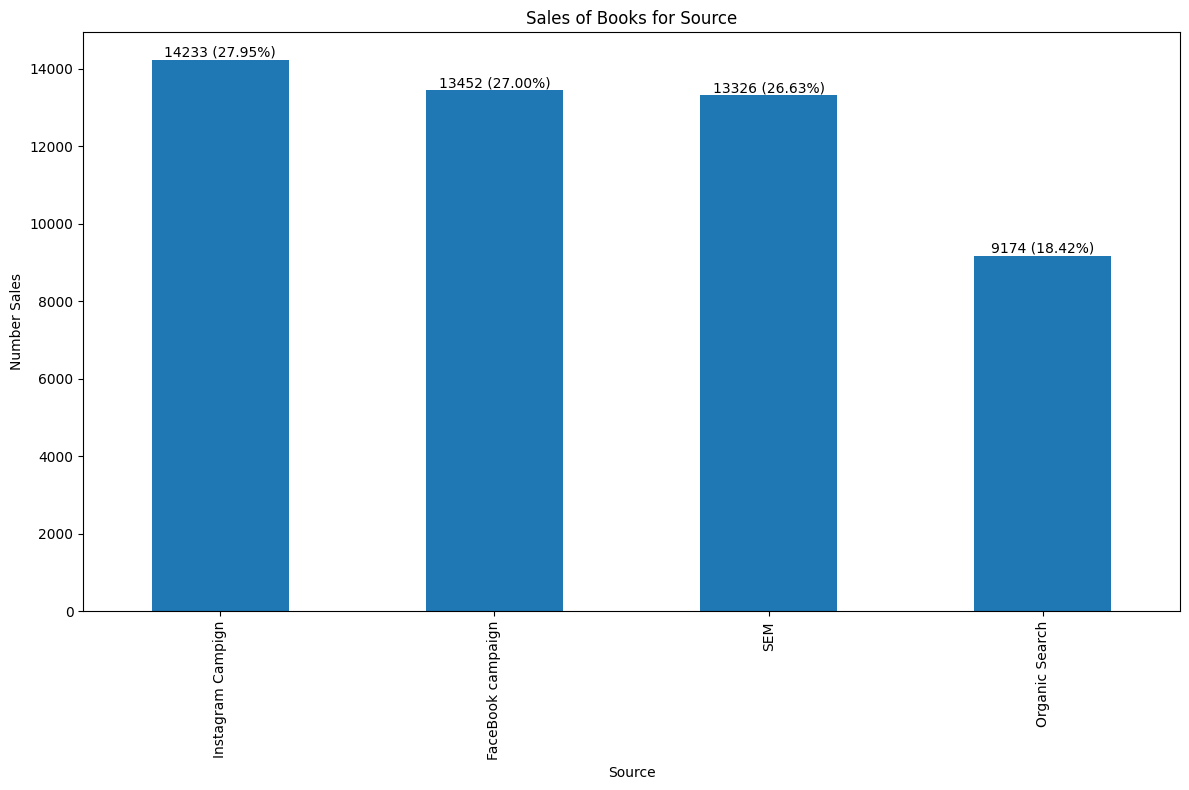

In [43]:
# Filtra os dados por categoria books
category = 'Books'
df_ctg = tabela[tabela['Product Category'] == category]

# Conta a quantidade de vendas por canal
ssb = df_ctg['Source'].value_counts()

# Calcula a porcentagem de vendas por canal
percentage_sales = (ssb / ssb.sum()) * 100

# Constrói um gráfico da quantidade de vendas por canal com a porcentagem
plt.figure(figsize=(12, 8))
ax = ss.plot(kind='bar')
plt.title(f'Sales of {category} for Source')
plt.xlabel('Source')
plt.ylabel('Number Sales')

# Adiciona anotações no gráfico com a porcentagem
for i in range(len(ss)):
    plt.text(i, ss[i], f"{ss[i]} ({percentage_sales[i]:.2f}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\103402080.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_data['Age Group'] = pd.cut(books_data['Customer Age'], bins=bins, labels=labels, right=False)
C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\103402080.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentage_sales[i]


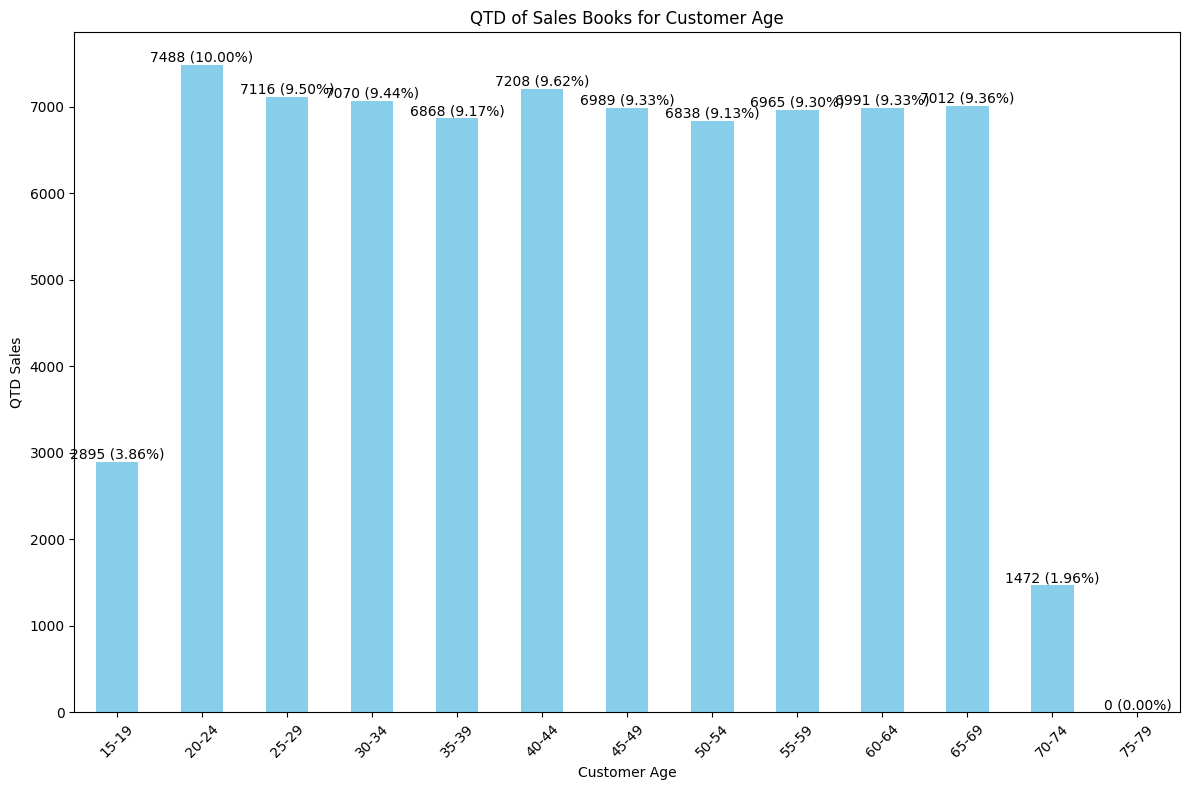

In [44]:
# Filtra os dados por categoria 'Books' e remove os valores nulos de idade
books_data = tabela[(tabela['Product Category'] == 'Books') & (tabela['Customer Age'].notnull())]

# Define as faixas etárias de 5 em 5 anos, começando a partir de 15 até 80 anos
bins = list(range(15, 81, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Criando uma nova coluna 'Age Group' com as faixas etárias
books_data['Age Group'] = pd.cut(books_data['Customer Age'], bins=bins, labels=labels, right=False)

# Conta a quantidade de vendas por faixa etária
sales_by_age_group = books_data['Age Group'].value_counts().sort_index()

# Calcula a porcentagem representativa dos dados
percentage_sales = (sales_by_age_group / sales_by_age_group.sum()) * 100

# Constrói um gráfico de barras para a quantidade de vendas por faixa etária com a porcentagem
plt.figure(figsize=(12, 8))
ax = sales_by_age_group.plot(kind='bar', color='skyblue')
plt.title('QTD of Sales Books for Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('QTD Sales')
plt.xticks(rotation=45)

# Adiciona anotações no gráfico com a quantidade e porcentagem
for i, p in enumerate(ax.patches):
    percentage = percentage_sales[i]
    ax.annotate(f'{p.get_height()} ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


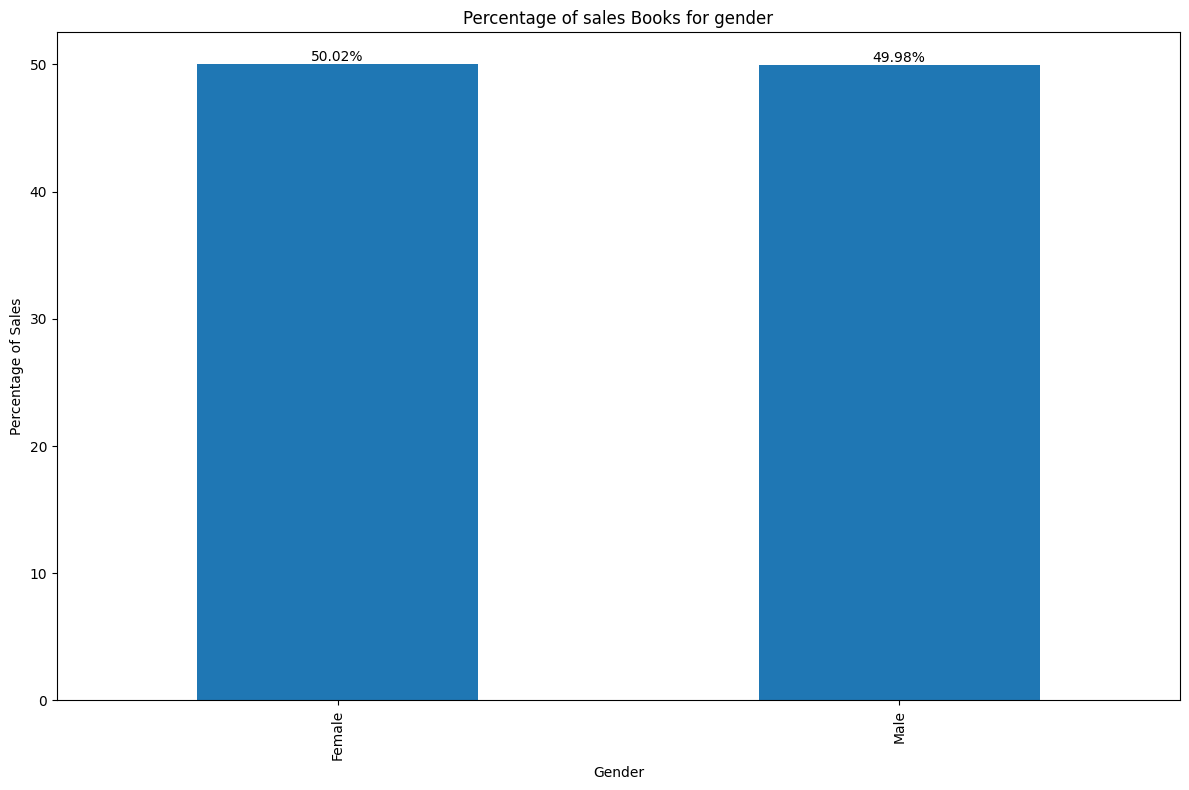

In [45]:
# Filtra os dados por categoria 'Books'
category = 'Books'
df_gen = tabela[tabela['Product Category'] == category]

# Conta a quantidade de vendas por gênero
cg = df_gen['Gender'].value_counts()

# Calcula a porcentagem de vendas por gênero
pctg = cg / cg.sum() * 100

# Constrói um gráfico da porcentagem de vendas por gênero
plt.figure(figsize=(12, 8))
px = pctg.plot(kind='bar')
plt.title(f'Percentage of sales {category} for gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Sales')

# Adiciona anotações no gráfico
for i in px.patches:
    px.annotate(f'{i.get_height():.2f}%', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


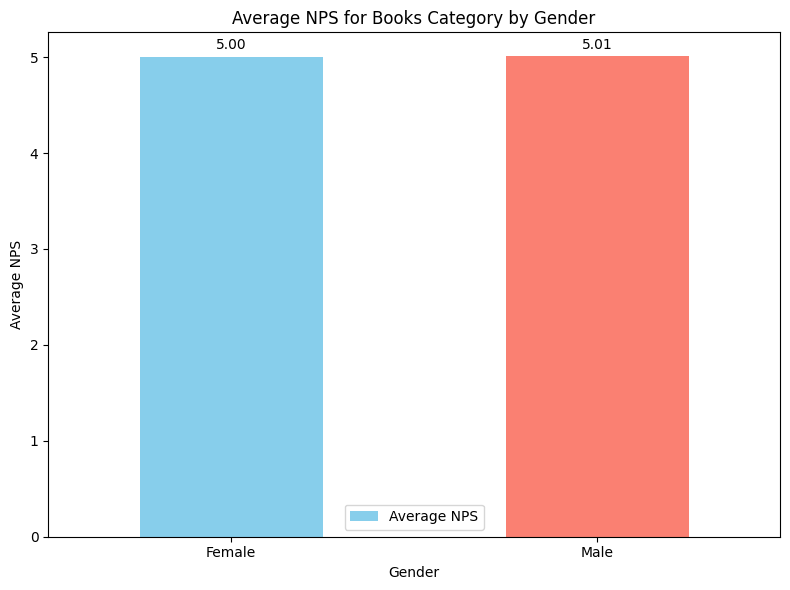

In [46]:
# Filtrar os dados apenas para a categoria "Books"
books_data = tabela[tabela['Product Category'] == 'Books']

# Calcular o NPS médio por gênero
average_nps_by_gender = books_data.groupby('Gender')['NPS'].mean()

# Contar o total de vendas por gênero
count_by_gender = books_data['Gender'].value_counts()

# Plotar o gráfico
plt.figure(figsize=(8, 6))
average_nps_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], label='Average NPS')

# Adicionar a média de NPS acima das barras
for i, nps in enumerate(average_nps_by_gender):
    plt.text(i, nps + 0.05, f'{nps:.2f}', ha='center', va='bottom')

plt.title('Average NPS for Books Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Average NPS')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\3477414002.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ssb[i], f"{ssb[i]} ({percentage_sales[i]:.2f}%)", ha='center', va='bottom')


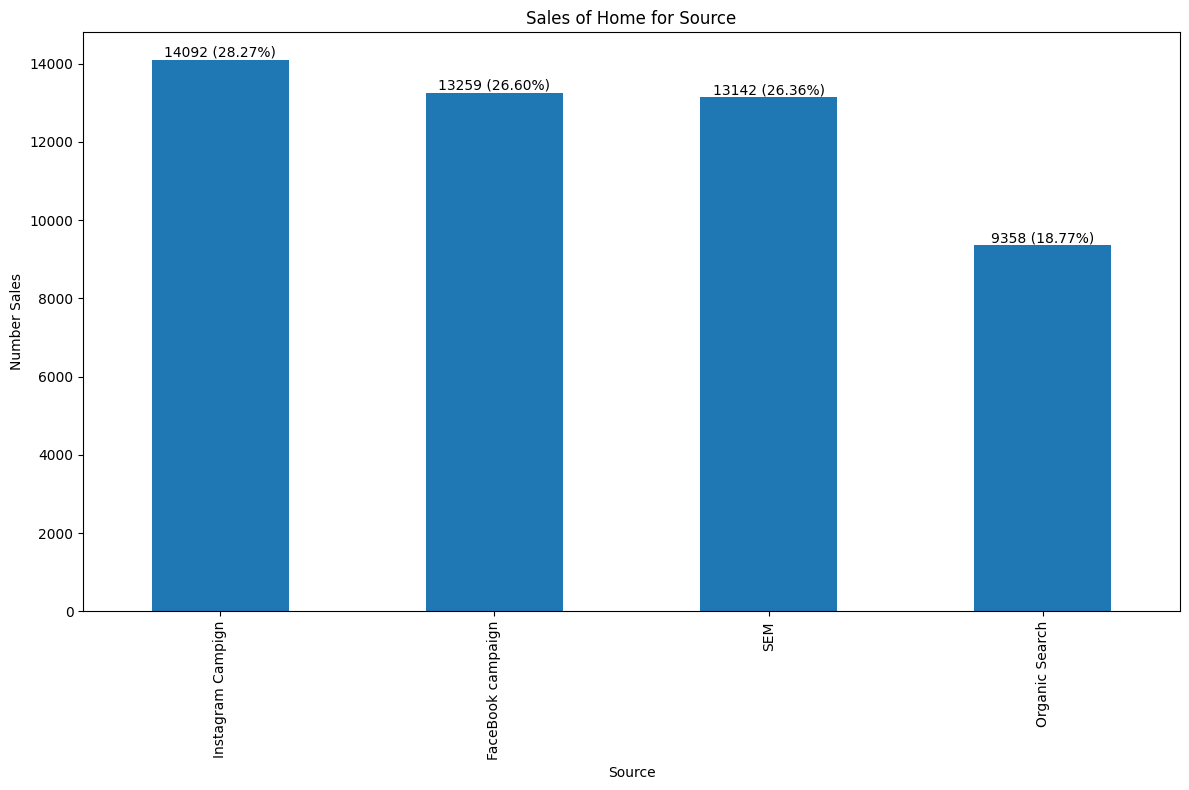

In [47]:
#Vendas por home

# Filtra os dados por categoria 'Home'
category = 'Home'
df_ctg = tabela[tabela['Product Category'] == category]

# Conta a quantidade de vendas por canal
ssb = df_ctg['Source'].value_counts()

# Calcula a porcentagem de vendas por canal
percentage_sales = (ssb / ssb.sum()) * 100

# Constrói um gráfico da quantidade de vendas por canal com a porcentagem
plt.figure(figsize=(12, 8))
ax = ssb.plot(kind='bar')
plt.title(f'Sales of {category} for Source')
plt.xlabel('Source')
plt.ylabel('Number Sales')

# Adiciona anotações no gráfico com a porcentagem
for i in range(len(ssb)):
    plt.text(i, ssb[i], f"{ssb[i]} ({percentage_sales[i]:.2f}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()



C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\4120714387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_data['Age Group'] = pd.cut(home_data['Customer Age'], bins=bins, labels=labels, right=False)
C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\4120714387.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentage_sales[i]


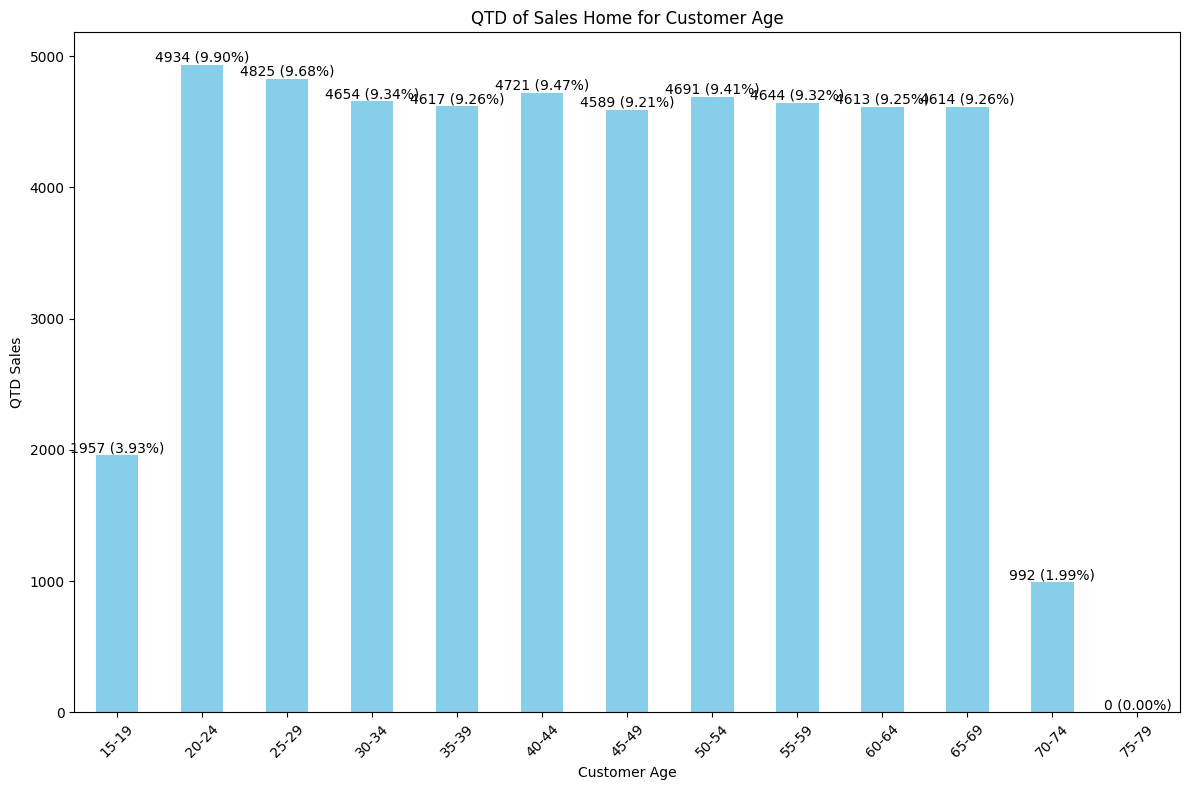

In [48]:
# Filtra os dados por categoria 'Home' e remove os valores nulos de idade
home_data = tabela[(tabela['Product Category'] == 'Home') & (tabela['Customer Age'].notnull())]

# Define as faixas etárias de 5 em 5 anos, começando a partir de 15 até 80 anos
bins = list(range(15, 81, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Criando uma nova coluna 'Age Group' com as faixas etárias
home_data['Age Group'] = pd.cut(home_data['Customer Age'], bins=bins, labels=labels, right=False)

# Conta a quantidade de vendas por faixa etária
sales_by_age_group = home_data['Age Group'].value_counts().sort_index()

# Calcula a porcentagem representativa dos dados
percentage_sales = (sales_by_age_group / sales_by_age_group.sum()) * 100

# Constrói um gráfico de barras para a quantidade de vendas por faixa etária com a porcentagem
plt.figure(figsize=(12, 8))
ax = sales_by_age_group.plot(kind='bar', color='skyblue')
plt.title('QTD of Sales Home for Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('QTD Sales')
plt.xticks(rotation=45)

# Adiciona anotações no gráfico com a quantidade e porcentagem
for i, p in enumerate(ax.patches):
    percentage = percentage_sales[i]
    ax.annotate(f'{p.get_height()} ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


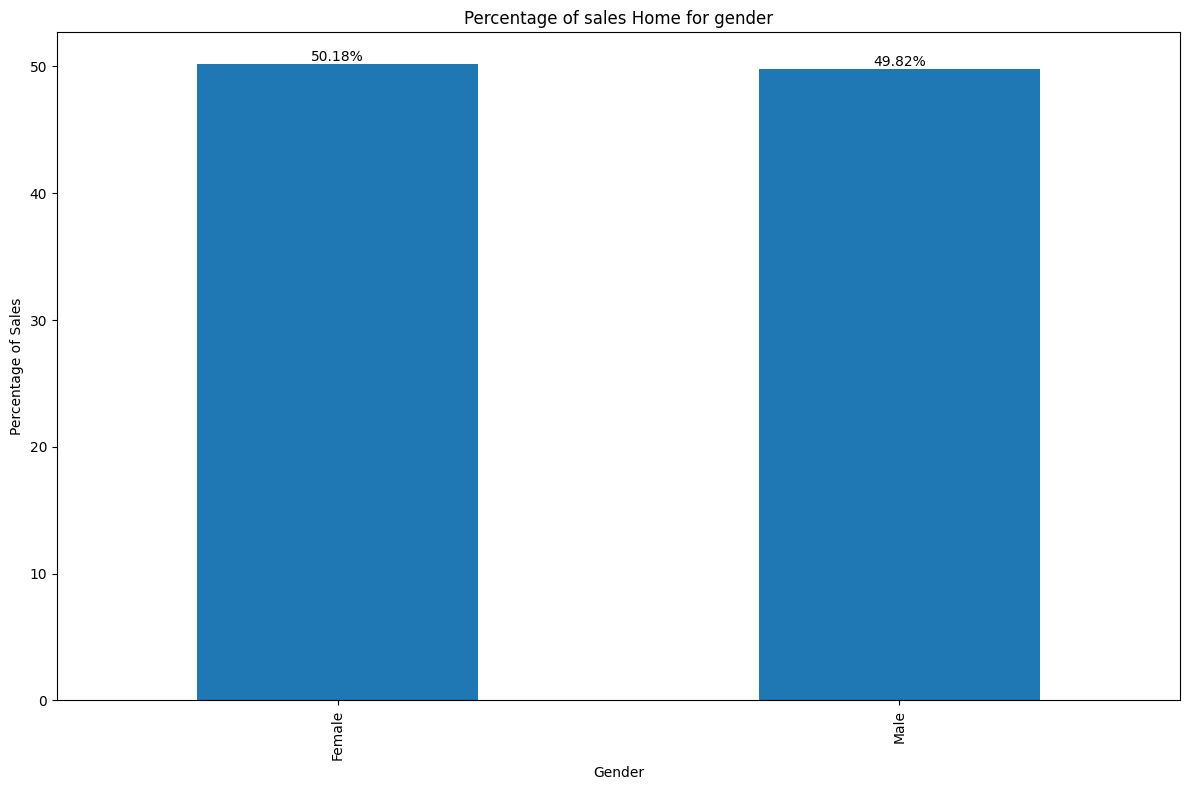

In [49]:
#PCT Hme for GEnder

# Filtra os dados por categoria 'Home'
category = 'Home'
df_gen = tabela[tabela['Product Category'] == category]

# Conta a quantidade de vendas por gênero
cg = df_gen['Gender'].value_counts()

# Calcula a porcentagem de vendas por gênero
pctg = cg / cg.sum() * 100

# Constrói um gráfico da porcentagem de vendas por gênero
plt.figure(figsize=(12, 8))
px = pctg.plot(kind='bar')
plt.title(f'Percentage of sales {category} for gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Sales')

# Adiciona anotações no gráfico
for i in px.patches:
    px.annotate(f'{i.get_height():.2f}%', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


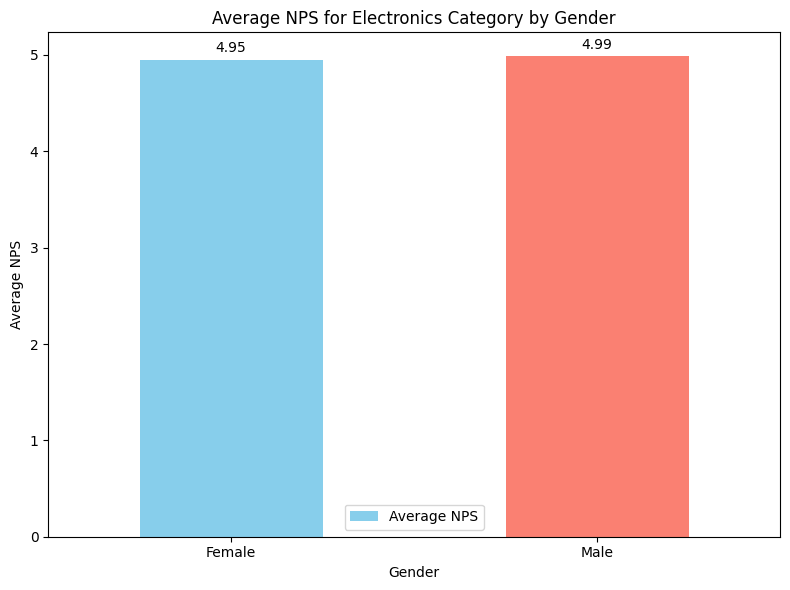

In [50]:
# NPC "Electronics" x gender
electronics_data = tabela[tabela['Product Category'] == 'Electronics']

# Calcular o NPS médio por gênero
average_nps_by_gender = electronics_data.groupby('Gender')['NPS'].mean()

# Contar o total de vendas por gênero
count_by_gender = electronics_data['Gender'].value_counts()

# Plotar o gráfico
plt.figure(figsize=(8, 6))
average_nps_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], label='Average NPS')

# Adicionar a média de NPS acima das barras
for i, nps in enumerate(average_nps_by_gender):
    plt.text(i, nps + 0.05, f'{nps:.2f}', ha='center', va='bottom')


plt.title('Average NPS for Electronics Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Average NPS')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()


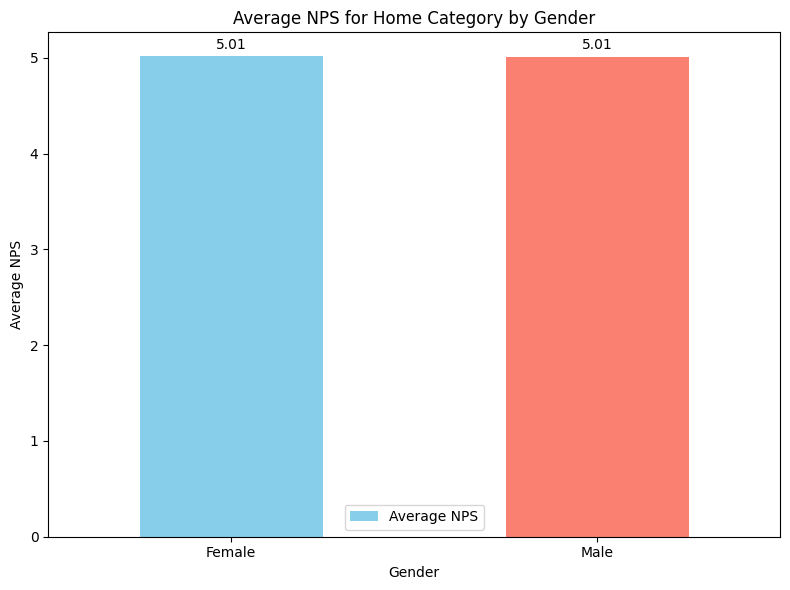

In [51]:
# Filtrar os dados apenas para a categoria "Home"
home_data = tabela[tabela['Product Category'] == 'Home']

# Calcular o NPS médio por gênero
average_nps_by_gender = home_data.groupby('Gender')['NPS'].mean()

# Contar o total de vendas por gênero
count_by_gender = home_data['Gender'].value_counts()

# Plotar o gráfico
plt.figure(figsize=(8, 6))
average_nps_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], label='Average NPS')

# Adicionar a média de NPS acima das barras
for i, nps in enumerate(average_nps_by_gender):
    plt.text(i, nps + 0.05, f'{nps:.2f}', ha='center', va='bottom')


plt.title('Average NPS for Home Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Average NPS')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\1191982140.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, ssb[i], f"{ssb[i]} ({percentage_sales[i]:.2f}%)", ha='center', va='bottom')


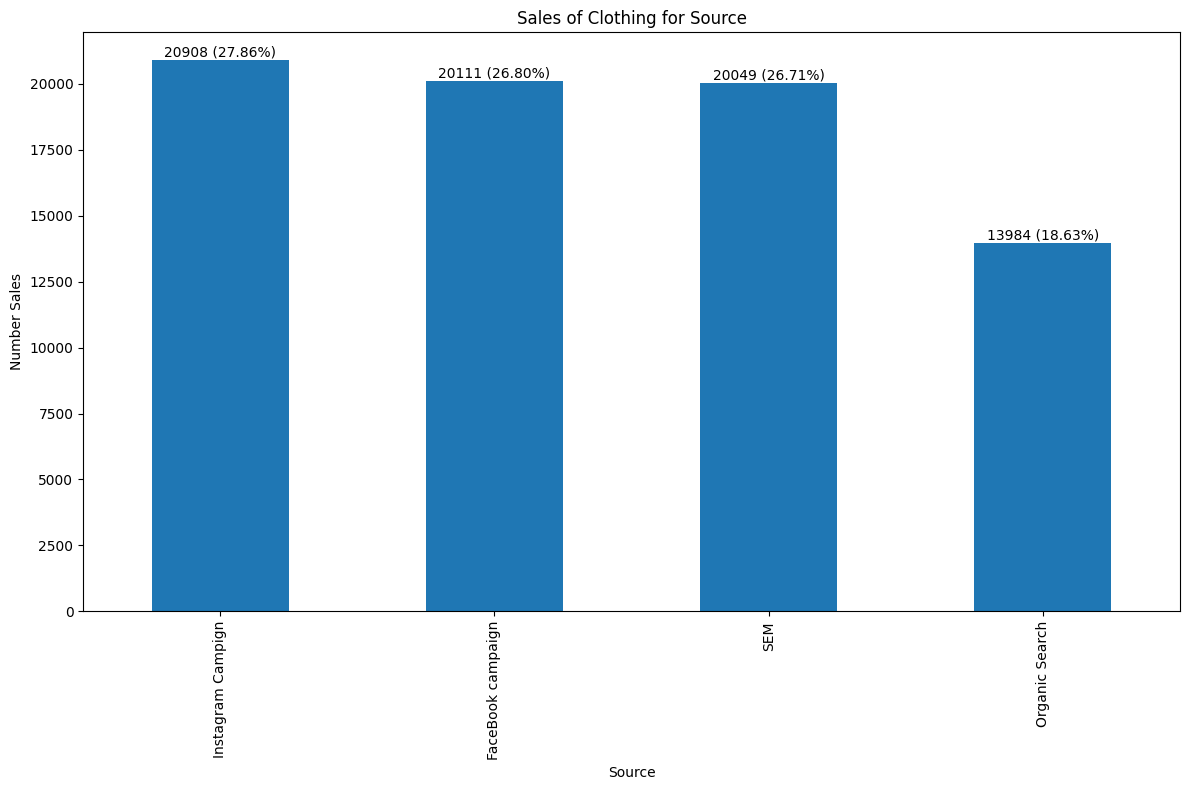

In [52]:
# Filtra os dados por categoria 'Clothings'
category = 'Clothing'
df_ctg = tabela[tabela['Product Category'] == category]

# Conta a quantidade de vendas por canal
ssb = df_ctg['Source'].value_counts()

# Calcula a porcentagem de vendas por canal
percentage_sales = (ssb / ssb.sum()) * 100

# Constrói um gráfico da quantidade de vendas por canal com a porcentagem
plt.figure(figsize=(12, 8))
ax = ssb.plot(kind='bar')
plt.title(f'Sales of {category} for Source')
plt.xlabel('Source')
plt.ylabel('Number Sales')

# Adiciona anotações no gráfico com a porcentagem
for i in range(len(ssb)):
    plt.text(i, ssb[i], f"{ssb[i]} ({percentage_sales[i]:.2f}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\2261612496.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothing_data['Age Group'] = pd.cut(clothing_data['Customer Age'], bins=bins, labels=labels, right=False)
C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\2261612496.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = percentage_sales[i]


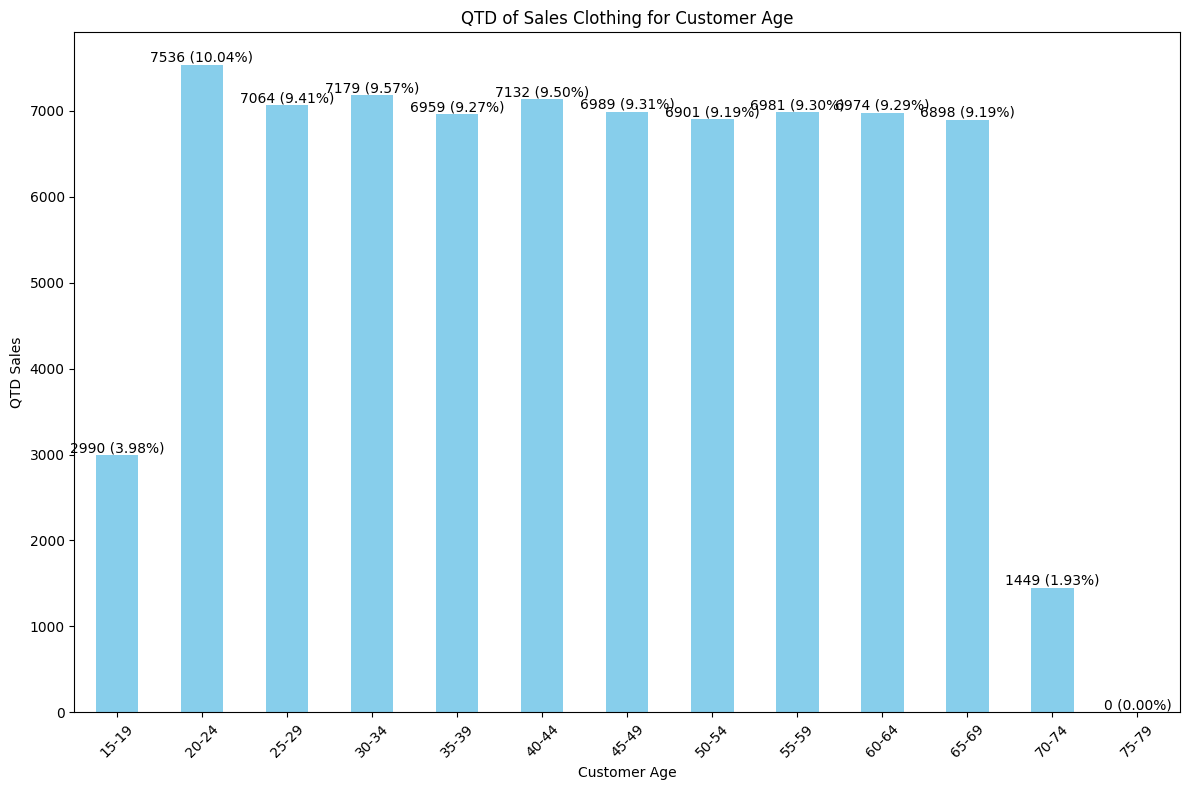

In [53]:
# Filtra os dados por categoria 'Clothing' e remove os valores nulos de idade
clothing_data = tabela[(tabela['Product Category'] == 'Clothing') & (tabela['Customer Age'].notnull())]

# Define as faixas etárias de 5 em 5 anos, começando a partir de 15 até 80 anos
bins = list(range(15, 81, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Criando uma nova coluna 'Age Group' com as faixas etárias
clothing_data['Age Group'] = pd.cut(clothing_data['Customer Age'], bins=bins, labels=labels, right=False)

# Conta a quantidade de vendas por faixa etária
sales_by_age_group = clothing_data['Age Group'].value_counts().sort_index()

# Calcula a porcentagem representativa dos dados
percentage_sales = (sales_by_age_group / sales_by_age_group.sum()) * 100

# Constrói um gráfico de barras para a quantidade de vendas por faixa etária com a porcentagem
plt.figure(figsize=(12, 8))
ax = sales_by_age_group.plot(kind='bar', color='skyblue')
plt.title('QTD of Sales Clothing for Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('QTD Sales')
plt.xticks(rotation=45)

# Adiciona anotações no gráfico com a quantidade e porcentagem
for i, p in enumerate(ax.patches):
    percentage = percentage_sales[i]
    ax.annotate(f'{p.get_height()} ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2, p.get_height() + 0.5),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


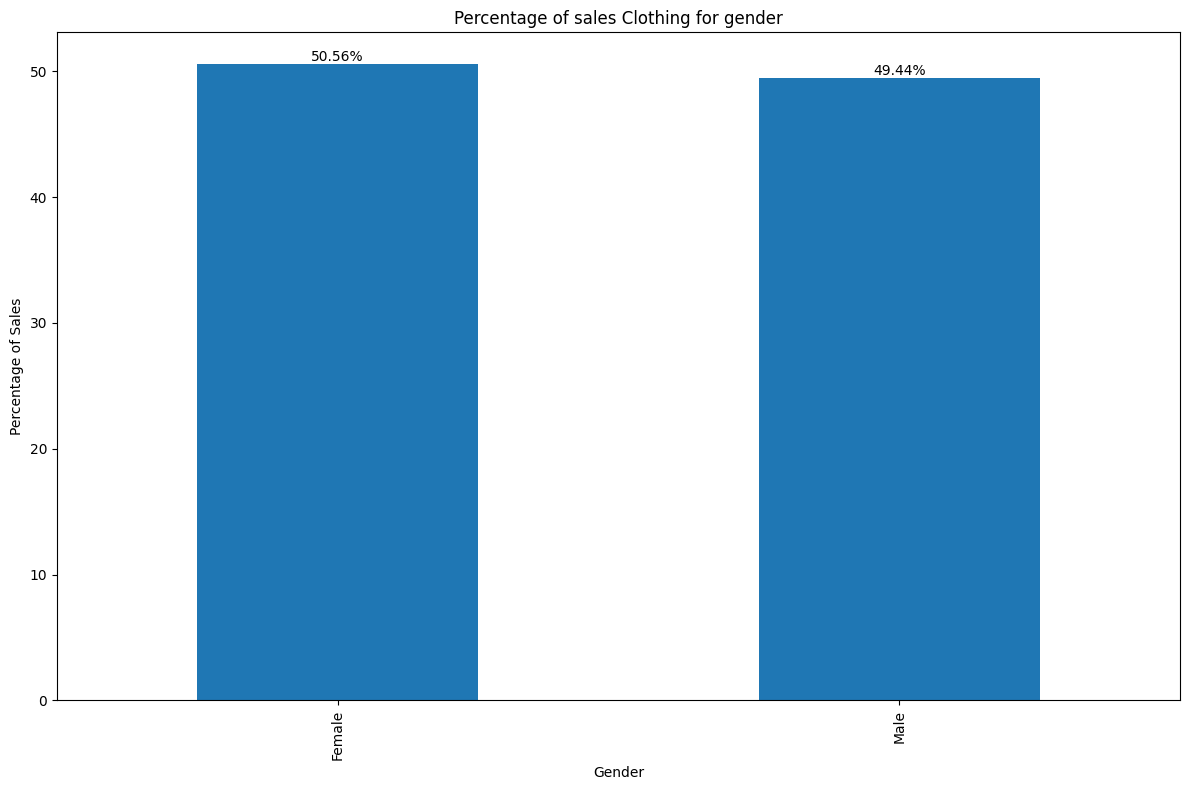

In [54]:
# Filtra os dados por categoria 'Clothing'
category = 'Clothing'
df_gen = tabela[tabela['Product Category'] == category]

# Conta a quantidade de vendas por gênero
cg = df_gen['Gender'].value_counts()

# Calcula a porcentagem de vendas por gênero
pctg = cg / cg.sum() * 100

# Constrói um gráfico da porcentagem de vendas por gênero
plt.figure(figsize=(12, 8))
px = pctg.plot(kind='bar')
plt.title(f'Percentage of sales {category} for gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Sales')

# Adiciona anotações no gráfico
for i in px.patches:
    px.annotate(f'{i.get_height():.2f}%', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


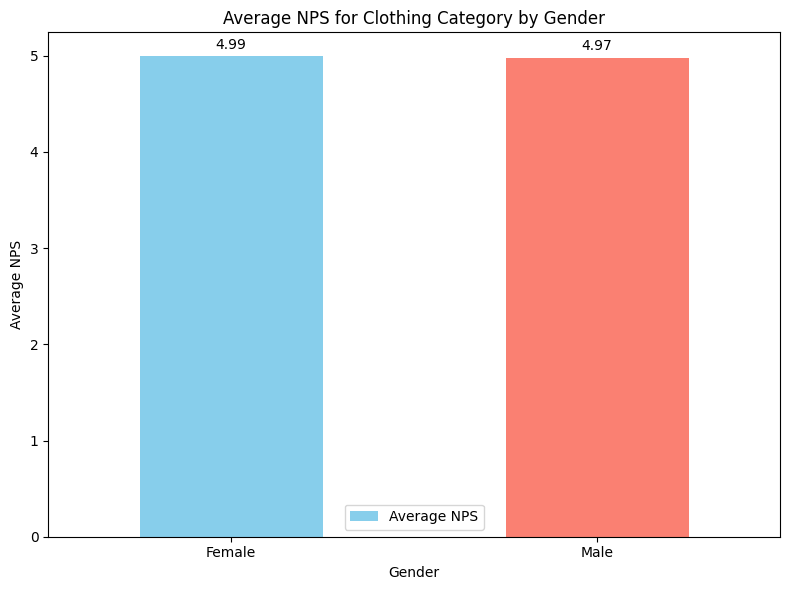

In [55]:
# Filtrar os dados apenas para a categoria "Clothing"
clothing_data = tabela[tabela['Product Category'] == 'Clothing']

# Calcular o NPS médio por gênero
average_nps_by_gender = clothing_data.groupby('Gender')['NPS'].mean()

# Contar o total de vendas por gênero
count_by_gender = clothing_data['Gender'].value_counts()

# Plotar o gráfico
plt.figure(figsize=(8, 6))
average_nps_by_gender.plot(kind='bar', color=['skyblue', 'salmon'], label='Average NPS')

# Adicionar a média de NPS acima das barras
for i, nps in enumerate(average_nps_by_gender):
    plt.text(i, nps + 0.05, f'{nps:.2f}', ha='center', va='bottom')

plt.title('Average NPS for Clothing Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Average NPS')
plt.xticks(rotation=0)
plt.legend()

plt.tight_layout()
plt.show()


In [56]:
# Agrupar os dados por 'Gender' e contar o número de compras
purchases_by_gender = tabela.groupby('Gender')['Product Category'].count().reset_index()

# Renomear as colunas para clareza
purchases_by_gender.columns = ['Gender', 'Total Purchases']

# Calcular o total de compras
total_purchases = purchases_by_gender['Total Purchases'].sum()

# Calcular o percentual de compras por gênero
purchases_by_gender['Percentage'] = (purchases_by_gender['Total Purchases'] / total_purchases) * 100

# Adicionar um título à tabela
print("Percentual de compra por gênero")
print()

# Exibir a tabela
print(purchases_by_gender)


Percentual de compra por gênero

   Gender  Total Purchases  Percentage
0  Female           125560      50.224
1    Male           124440      49.776


In [57]:
# Remover valores nulos na coluna 'Customer Age'
tabela_cleaned = tabela[tabela['Customer Age'].notnull()]

# Definir as faixas etárias de 5 em 5 anos, começando a partir de 15 até 80 anos
bins = list(range(15, 81, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Criar uma nova coluna 'Age Group' com as faixas etárias
tabela_cleaned['Age Group'] = pd.cut(tabela_cleaned['Customer Age'], bins=bins, labels=labels, right=False)

# Calcular a média de NPS por faixa etária
average_nps_by_age_group = tabela_cleaned.groupby('Age Group')['NPS'].mean().reset_index()

# Formatar a média de NPS para duas casas decimais
average_nps_by_age_group['NPS'] = average_nps_by_age_group['NPS'].round(2)

# Ordenar os dados pela média de NPS, da maior para a menor
average_nps_by_age_group = average_nps_by_age_group.sort_values(by='NPS', ascending=False)

# Imprimir o título
print("Média NPS por faixa etária")
print()

# Exibir a tabela sem a coluna de enumeração
print(average_nps_by_age_group.to_string(index=False))


Média NPS por faixa etária

Age Group  NPS
    15-19 5.03
    30-34 5.02
    55-59 5.02
    65-69 5.01
    35-39 5.00
    45-49 5.00
    25-29 4.99
    50-54 4.99
    60-64 4.97
    20-24 4.96
    40-44 4.95
    70-74 4.94
    75-79  NaN


C:\Users\Everton Junior\AppData\Local\Temp\ipykernel_14376\4169440789.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_nps_by_age_group = tabela_cleaned.groupby('Age Group')['NPS'].mean().reset_index()
